In [1]:
import os

import numpy as np

from scipy.special import gammainc
from scipy.special import gamma

CumulativeSums and Serial Tests calculate 2 p-values for each sequence (forward and backward modes).
Therefore we take their pvalue as the average of the pvalues in the 2 modes.

In [2]:
rootdir = './logs/'
subdirs = [ f.path + '/' for f in os.scandir(rootdir) if f.is_dir() ]

In [3]:
# for subdir in subdirs:
#     for file in ['2.txt', '8.txt']:
#         # https://stackoverflow.com/a/15956341/13226807
#         pval = np.genfromtxt(subdir + file)
#         pval = np.mean(pval.reshape(-1, 2), axis=1)
#         np.savetxt(subdir + file, pval, delimiter='\n')

In [4]:
def CT_SingleUtil(pval, x, y):
    # STEP 1
    K = 10 # no. of sub-intervals
    S = np.zeros(K) # no. of sequences 

    for i in range(pval.shape[0]):
        px = pval[i][x]
        py = pval[i][y]
        dp = px - py
        for j in range(K):
            if -1 <= dp and dp <= (-1 + 2/K):
                S[0]+=1
            elif (-1 + 2*j/K) < dp and dp <= (-1 + 2*(j+1)/K):
                S[j]+=1
   
    # STEP 2
    P = np.array([0.02, 0.06, 0.1, 0.14, 0.18, 0.18, 0.14, 0.1, 0.06, 0.02])
    V = 0
    for i in range(K):
        V += ((S[i] - pval.shape[0]*P[i])**2) / (pval.shape[0]*P[i])
    
    # STEP 3
    # https://stackoverflow.com/a/38715054
    a = (K-1)/2
    x = V/2
    PT = gamma(a)*(1-gammainc(a,x))
    
    # STEP 4
    if(PT > 0.001):
        return 1
    else:
        return 0

CT_Single

In [5]:
def CT_Single(subdir):
    pval = np.transpose(np.array([np.genfromtxt(subdir + file) for file in os.listdir(subdir)]))

    single_result = np.zeros((pval.shape[1], pval.shape[1]))
    for x in range(pval.shape[1]):
        for y in range(pval.shape[1]):
            single_result[x][y] = CT_SingleUtil(pval, x, y)   
    return single_result

CT_Total

In [6]:
def CT_Total(subdirs):
    total_result = np.zeros((11, 11))
    for subdir in subdirs:
        single_result = CT_Single(subdir)
        total_result = np.add(total_result, single_result)
    return total_result

Main

In [7]:
total_result = CT_Total(subdirs)

In [8]:
np.savetxt("corr.csv", total_result, delimiter=",")

In [9]:
import pandas as pd
import seaborn as sns

In [10]:
test_names = ['Frequency',
              'BlockFrequency',
              'CumulativeSums',
              'Runs',
              'LongestRun',
              'Rank',
              'Universal',
              'ApproximateEntropy',
              'Serial',
              'LinearComplexity',
              'FFT']
corr = pd.read_csv("corr.csv", names=test_names)
corr.index = test_names
corr

,Frequency,BlockFrequency,CumulativeSums,Runs,LongestRun,Rank,Universal,ApproximateEntropy,Serial,LinearComplexity,FFT
Frequency,0.0,0.0,2.0,1.0,1.0,0.0,1.0,4.0,8.0,7.0,2.0
BlockFrequency,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
CumulativeSums,3.0,0.0,0.0,1.0,0.0,2.0,0.0,0.0,6.0,5.0,0.0
Runs,1.0,0.0,6.0,0.0,4.0,3.0,3.0,3.0,14.0,10.0,1.0
LongestRun,3.0,0.0,2.0,1.0,0.0,2.0,1.0,2.0,9.0,4.0,0.0
Rank,3.0,0.0,2.0,2.0,0.0,0.0,1.0,2.0,17.0,11.0,2.0
Universal,1.0,0.0,3.0,3.0,1.0,1.0,0.0,0.0,19.0,7.0,1.0
ApproximateEntropy,1.0,0.0,2.0,1.0,3.0,1.0,1.0,0.0,18.0,0.0,0.0
Serial,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
LinearComplexity,3.0,0.0,10.0,2.0,3.0,7.0,1.0,0.0,26.0,0.0,3.0


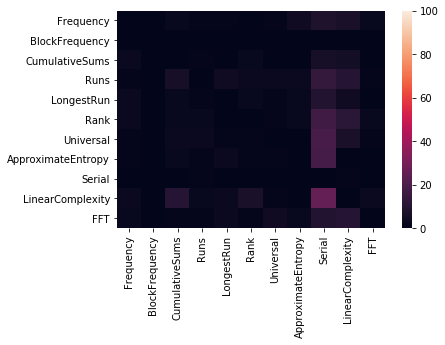

In [11]:
sns.heatmap(corr, vmin=0, vmax=100)